In [1]:
import uproot4 as uproot
print(uproot.__version__)
import numpy as np
import matplotlib.pyplot as plt
# Run this once to install mplhep:
#!pip install mplhep --user 
#!pip install --user awkward1
import mplhep as hep
import pandas as pd
import awkward as ak
# Load style sheet
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb

0.1.2


In [2]:
file = uproot.open("ATHENA-CC-DIS-2021-06-15-oleaa/ATHENA-CC-DIS-2021-06-15-oleaa-1M.root")

In [3]:
file.keys()
tree = file["tree"]
tree.values()

[<TBranch 'Event_BJQ2' at 0x2aaad4a6f640>,
 <TBranch 'Event_BJx' at 0x2aaad4a6f9d0>,
 <TBranch 'Event_BJy' at 0x2aaad4a6fac0>,
 <TBranch 'Event_JBQ2' at 0x2aaad4a63a60>,
 <TBranch 'Event_JBx' at 0x2aaad4a63df0>,
 <TBranch 'Event_MET_ET' at 0x2aaad4a89cd0>,
 <TBranch 'Event_MET_Phi' at 0x2aaad4a80b50>,
 <TBranchElement 'Electron_ChargedElectron_CALO_Eem' at 0x2aaad4a807c0>,
 <TBranchElement 'Electron_ChargedElectron_CALO_Ehad' at 0x2aaad4aa6ee0>,
 <TBranchElement 'Electron_ChargedElectron_KIN_Eta' at 0x2aaad4aa6df0>,
 <TBranchElement 'Electron_ChargedElectron_KIN_M' at 0x2aaad4a76a00>,
 <TBranchElement 'Electron_ChargedElectron_KIN_PT' at 0x2aaad4a87850>,
 <TBranchElement 'Electron_ChargedElectron_KIN_Phi' at 0x2aaad4a98460>,
 <TBranchElement 'Electron_ChargedElectron_TRU_ID' at 0x2aaad4a98ee0>,
 <TBranchElement 'Electron_TaggingElectron_KIN_Eta' at 0x2aaad4a9f850>,
 <TBranchElement 'Electron_TaggingElectron_KIN_M' at 0x2aaad4a8bd00>,
 <TBranchElement 'Electron_TaggingElectron_KIN_PT' a

In [4]:
def JetTrackCount(row):
    t1_pt = row["Jet_FiducialJet_TAG_t1_PT"]
    t2_pt = row["Jet_FiducialJet_TAG_t2_PT"]
    t3_pt = row["Jet_FiducialJet_TAG_t3_PT"]
    t4_pt = row["Jet_FiducialJet_TAG_t4_PT"]
    
    t1_sip3d = row["Jet_FiducialJet_TAG_t1_sIP3D"]
    t2_sip3d = row["Jet_FiducialJet_TAG_t2_sIP3D"]
    t3_sip3d = row["Jet_FiducialJet_TAG_t3_sIP3D"]
    t4_sip3d = row["Jet_FiducialJet_TAG_t4_sIP3D"]
  
    ntrk = 0;
    
    #jet_ntrk = []
    
    if t1_pt > 0.0 and t1_sip3d > 3.0:
        ntrk += 1
    if t2_pt > 0.0 and t2_sip3d > 3.0:
        ntrk +=1
    if t3_pt > 0.0 and t3_sip3d > 3.0:
        ntrk +=1
    if t4_pt > 0.0 and t4_sip3d > 3.0:
        ntrk +=1

    #jet_trk.append(ntrk)
    
    return ntrk

In [5]:
class HistManager:
    def __init__(self):
        self.histograms = {}
    

    def clear(self):
        self.histograms = {}

    def add(self, df, name, x, cuts=[], nbins=100, range=[0,1]):
        
        
        #branch = df[varString].ravel()
    
        mask = np.ones(len(x), dtype=bool)

        for cut in cuts:
            if len(mask) != len(cut):
                print("Error: existing bitmask and new cut bitmask have different sizes!")

            mask = np.bitwise_and(np.array(mask), np.array(cut))
        
        if name not in self.histograms:
            print(f"Creating histogram named {name} ... ")
            self.histograms[name] = np.histogram(x[mask], nbins, range)
        else:
            (hist, bins) = np.histogram(x[mask], nbins, range)
            newhist = np.sum([hist, self.histograms[name][0]], axis=0)
            self.histograms[name] = (newhist, self.histograms[name][1])
    
    def get_all(self):
        return self.histograms

    def get(self, name):
        return self.histograms[name]

    def get_hist(self, name):
        return self.histograms[name][0]
    
    def get_bins(self, name):
        return self.histograms[name][1]


In [7]:
# files = {"ATHENA-CC-DIS-2021-06-15-oleaa/[0-9]/out.root": "tree", 
#          "ATHENA-CC-DIS-2021-06-15-oleaa/[1-9][0-9]/out.root": "tree"}


#files = {"ATHENA-CC-DIS-2021-06-15-oleaa/0/out.root": "tree"}

files = {"ATHENA-CC-DIS-2021-06-15-oleaa/ATHENA-CC-DIS-2021-06-15-oleaa-2M.root": "tree"}

branches = ['Jet_FiducialJet_TRU_ID', 
            'Jet_FiducialJet_TAG_jet_charge_05',
            'Jet_FiducialJet_TAG_t1_sIP3D', 'Jet_FiducialJet_TAG_t1_PT',
            'Jet_FiducialJet_TAG_t1_d0err', 'Jet_FiducialJet_TAG_t1_z0err',
            'Jet_FiducialJet_TAG_t2_sIP3D', 'Jet_FiducialJet_TAG_t2_PT', 
            'Jet_FiducialJet_TAG_t2_d0err', 'Jet_FiducialJet_TAG_t2_z0err',
            'Jet_FiducialJet_TAG_t3_sIP3D', 'Jet_FiducialJet_TAG_t3_PT',  
            'Jet_FiducialJet_TAG_t3_d0err', 'Jet_FiducialJet_TAG_t3_z0err',
            'Jet_FiducialJet_TAG_t4_sIP3D', 'Jet_FiducialJet_TAG_t4_PT',   
            'Jet_FiducialJet_TAG_t4_d0err', 'Jet_FiducialJet_TAG_t4_z0err',
            'Jet_FiducialJet_TAG_k1_sIP3D', 'Jet_FiducialJet_TAG_k1_PT', 'Jet_FiducialJet_TAG_k1_q',
            'Jet_FiducialJet_KIN_PT', 'Jet_FiducialJet_TAG_sIP3DTagger']

ncharm_jets = 0
ncharm_tagged = 0
nlight_jets = 0
nlight_tagged = 0

lastbatch = {}

histograms = HistManager()

for batch in uproot.iterate([files], 
                            branches, 
                            library="pd"):
    
    lastbatch = batch
    
    jet_ID = batch["Jet_FiducialJet_TRU_ID"].ravel()
    jet_charge_05 = batch["Jet_FiducialJet_TAG_jet_charge_05"].ravel()
    jet_t1_sIP3D = batch["Jet_FiducialJet_TAG_t1_sIP3D"].ravel()
    jet_t1_PT = batch["Jet_FiducialJet_TAG_t1_PT"].ravel()
    jet_t1_d0err = batch["Jet_FiducialJet_TAG_t1_d0err"].ravel()
    jet_t1_z0err = batch["Jet_FiducialJet_TAG_t1_z0err"].ravel()
    jet_t2_sIP3D = batch["Jet_FiducialJet_TAG_t2_sIP3D"].ravel()
    jet_t2_PT = batch["Jet_FiducialJet_TAG_t2_PT"].ravel()
    jet_t2_d0err = batch["Jet_FiducialJet_TAG_t2_d0err"].ravel()
    jet_t2_z0err = batch["Jet_FiducialJet_TAG_t2_z0err"].ravel()
    jet_t3_sIP3D = batch["Jet_FiducialJet_TAG_t3_sIP3D"].ravel()
    jet_t3_PT = batch["Jet_FiducialJet_TAG_t3_PT"].ravel()
    jet_t3_d0err = batch["Jet_FiducialJet_TAG_t3_d0err"].ravel()
    jet_t3_z0err = batch["Jet_FiducialJet_TAG_t3_z0err"].ravel()
    jet_t4_sIP3D = batch["Jet_FiducialJet_TAG_t4_sIP3D"].ravel()
    jet_t4_PT = batch["Jet_FiducialJet_TAG_t4_PT"].ravel()
    jet_t4_d0err = batch["Jet_FiducialJet_TAG_t4_d0err"].ravel()
    jet_t4_z0err = batch["Jet_FiducialJet_TAG_t4_z0err"].ravel()

    jet_k1_sIP3D = batch["Jet_FiducialJet_TAG_k1_sIP3D"].ravel()
    jet_k1_PT = batch["Jet_FiducialJet_TAG_k1_PT"].ravel()
    jet_k1_q = batch["Jet_FiducialJet_TAG_k1_q"].ravel()

    
    
    # Only retain array entries from charm, strange, and light jets
    lightjets = (jet_ID < 3) | (jet_ID == 21)
    gluonjets = (jet_ID == 21)
    upjets = (jet_ID == 2) 
    downjets = (jet_ID == 1)
    strangejets = (jet_ID == 3)
    charmjets = (jet_ID == 4)

    
    # Jet Charge Plots
    histograms.add(batch, "ljet_jet_charge_05", jet_charge_05, cuts=[lightjets], nbins=100, range=[-2, 2])
    histograms.add(batch, "ujet_jet_charge_05", jet_charge_05, cuts=[upjets], nbins=100, range=[-2, 2])
    histograms.add(batch, "djet_jet_charge_05", jet_charge_05, cuts=[downjets], nbins=100, range=[-2, 2])
    histograms.add(batch, "gjet_jet_charge_05", jet_charge_05, cuts=[gluonjets], nbins=100, range=[-2, 2])
    histograms.add(batch, "sjet_jet_charge_05", jet_charge_05, cuts=[strangejets], nbins=100, range=[-2, 2])
    histograms.add(batch, "cjet_jet_charge_05", jet_charge_05, cuts=[charmjets], nbins=100, range=[-2, 2])
    
    
    # Track sIP3D Plots
    t1_is_valid = (jet_t1_d0err != 0.0) & (jet_t1_z0err != 0.0)
    t2_is_valid = (jet_t2_d0err != 0.0) & (jet_t2_z0err != 0.0)
    t3_is_valid = (jet_t3_d0err != 0.0) & (jet_t3_z0err != 0.0)
    t4_is_valid = (jet_t4_d0err != 0.0) & (jet_t4_z0err != 0.0)
    histograms.add(batch, "ljet_track_sIP3D", jet_t1_sIP3D, cuts=[lightjets, (jet_t1_PT>0), t1_is_valid], nbins=200, range=[-100, 100])
    histograms.add(batch, "ljet_track_sIP3D", jet_t2_sIP3D, cuts=[lightjets, (jet_t2_PT>0), t2_is_valid], nbins=200, range=[-100, 100])
    histograms.add(batch, "ljet_track_sIP3D", jet_t3_sIP3D, cuts=[lightjets, (jet_t3_PT>0), t3_is_valid], nbins=200, range=[-100, 100])
    histograms.add(batch, "ljet_track_sIP3D", jet_t4_sIP3D, cuts=[lightjets, (jet_t4_PT>0), t4_is_valid], nbins=200, range=[-100, 100])

    histograms.add(batch, "sjet_track_sIP3D", jet_t1_sIP3D, cuts=[strangejets, (jet_t1_PT>0), t1_is_valid], nbins=200, range=[-100, 100])
    histograms.add(batch, "sjet_track_sIP3D", jet_t2_sIP3D, cuts=[strangejets, (jet_t2_PT>0), t2_is_valid], nbins=200, range=[-100, 100])
    histograms.add(batch, "sjet_track_sIP3D", jet_t3_sIP3D, cuts=[strangejets, (jet_t3_PT>0), t3_is_valid], nbins=200, range=[-100, 100])
    histograms.add(batch, "sjet_track_sIP3D", jet_t4_sIP3D, cuts=[strangejets, (jet_t4_PT>0), t4_is_valid], nbins=200, range=[-100, 100])

    histograms.add(batch, "cjet_track_sIP3D", jet_t1_sIP3D, cuts=[charmjets, (jet_t1_PT>0), t1_is_valid], nbins=200, range=[-100, 100])
    histograms.add(batch, "cjet_track_sIP3D", jet_t2_sIP3D, cuts=[charmjets, (jet_t2_PT>0), t2_is_valid], nbins=200, range=[-100, 100])
    histograms.add(batch, "cjet_track_sIP3D", jet_t3_sIP3D, cuts=[charmjets, (jet_t3_PT>0), t3_is_valid], nbins=200, range=[-100, 100])
    histograms.add(batch, "cjet_track_sIP3D", jet_t4_sIP3D, cuts=[charmjets, (jet_t4_PT>0), t4_is_valid], nbins=200, range=[-100, 100])

    # track PT plots
    
    histograms.add(batch, "ljet_track_PT", jet_t1_PT, cuts=[lightjets, (jet_t1_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "ljet_track_PT", jet_t2_PT, cuts=[lightjets, (jet_t2_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "ljet_track_PT", jet_t3_PT, cuts=[lightjets, (jet_t3_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "ljet_track_PT", jet_t4_PT, cuts=[lightjets, (jet_t4_PT>0)], nbins=200, range=[-100, 100])

    histograms.add(batch, "sjet_track_PT", jet_t1_PT, cuts=[strangejets, (jet_t1_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "sjet_track_PT", jet_t2_PT, cuts=[strangejets, (jet_t2_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "sjet_track_PT", jet_t3_PT, cuts=[strangejets, (jet_t3_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "sjet_track_PT", jet_t4_PT, cuts=[strangejets, (jet_t4_PT>0)], nbins=200, range=[-100, 100])

    histograms.add(batch, "cjet_track_PT", jet_t1_PT, cuts=[charmjets, (jet_t1_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "cjet_track_PT", jet_t2_PT, cuts=[charmjets, (jet_t2_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "cjet_track_PT", jet_t3_PT, cuts=[charmjets, (jet_t3_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "cjet_track_PT", jet_t4_PT, cuts=[charmjets, (jet_t4_PT>0)], nbins=200, range=[-100, 100])
    
 
    # Total track count (up to 4) in jets
    jet_ntrk = batch.apply(JetTrackCount,axis=1)
    histograms.add(batch, "ljet_track_n", jet_ntrk, cuts=[lightjets],   nbins=5, range=[0, 5])
    histograms.add(batch, "sjet_track_n", jet_ntrk, cuts=[strangejets], nbins=5, range=[0, 5])
    histograms.add(batch, "cjet_track_n", jet_ntrk, cuts=[charmjets],   nbins=5, range=[0, 5])
    
    
    # Jet track d0 and z0 error
 
    histograms.add(batch, "ljet_track_d0err", jet_t1_d0err/1e-3, cuts=[lightjets, (jet_t1_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "ljet_track_d0err", jet_t2_d0err/1e-3, cuts=[lightjets, (jet_t2_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "ljet_track_d0err", jet_t3_d0err/1e-3, cuts=[lightjets, (jet_t3_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "ljet_track_d0err", jet_t4_d0err/1e-3, cuts=[lightjets, (jet_t4_PT>0)], nbins=200, range=[-100, 100])

    histograms.add(batch, "sjet_track_d0err", jet_t1_d0err/1e-3, cuts=[strangejets, (jet_t1_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "sjet_track_d0err", jet_t2_d0err/1e-3, cuts=[strangejets, (jet_t2_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "sjet_track_d0err", jet_t3_d0err/1e-3, cuts=[strangejets, (jet_t3_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "sjet_track_d0err", jet_t4_d0err/1e-3, cuts=[strangejets, (jet_t4_PT>0)], nbins=200, range=[-100, 100])

    histograms.add(batch, "cjet_track_d0err", jet_t1_d0err/1e-3, cuts=[charmjets, (jet_t1_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "cjet_track_d0err", jet_t2_d0err/1e-3, cuts=[charmjets, (jet_t2_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "cjet_track_d0err", jet_t3_d0err/1e-3, cuts=[charmjets, (jet_t3_PT>0)], nbins=200, range=[-100, 100])
    histograms.add(batch, "cjet_track_d0err", jet_t4_d0err/1e-3, cuts=[charmjets, (jet_t4_PT>0)], nbins=200, range=[-100, 100])

    histograms.add(batch, "ljet_track_z0err", jet_t1_z0err/1e-3, cuts=[lightjets, (jet_t1_PT>0)], nbins=600, range=[-300, 300])
    histograms.add(batch, "ljet_track_z0err", jet_t2_z0err/1e-3, cuts=[lightjets, (jet_t2_PT>0)], nbins=600, range=[-300, 300])
    histograms.add(batch, "ljet_track_z0err", jet_t3_z0err/1e-3, cuts=[lightjets, (jet_t3_PT>0)], nbins=600, range=[-300, 300])
    histograms.add(batch, "ljet_track_z0err", jet_t4_z0err/1e-3, cuts=[lightjets, (jet_t4_PT>0)], nbins=600, range=[-300, 300])

    histograms.add(batch, "sjet_track_z0err", jet_t1_z0err/1e-3, cuts=[strangejets, (jet_t1_PT>0)], nbins=600, range=[-300, 300])
    histograms.add(batch, "sjet_track_z0err", jet_t2_z0err/1e-3, cuts=[strangejets, (jet_t2_PT>0)], nbins=600, range=[-300, 300])
    histograms.add(batch, "sjet_track_z0err", jet_t3_z0err/1e-3, cuts=[strangejets, (jet_t3_PT>0)], nbins=600, range=[-300, 300])
    histograms.add(batch, "sjet_track_z0err", jet_t4_z0err/1e-3, cuts=[strangejets, (jet_t4_PT>0)], nbins=600, range=[-300, 300])

    histograms.add(batch, "cjet_track_z0err", jet_t1_z0err/1e-3, cuts=[charmjets, (jet_t1_PT>0)], nbins=600, range=[-300, 300])
    histograms.add(batch, "cjet_track_z0err", jet_t2_z0err/1e-3, cuts=[charmjets, (jet_t2_PT>0)], nbins=600, range=[-300, 300])
    histograms.add(batch, "cjet_track_z0err", jet_t3_z0err/1e-3, cuts=[charmjets, (jet_t3_PT>0)], nbins=600, range=[-300, 300])
    histograms.add(batch, "cjet_track_z0err", jet_t4_z0err/1e-3, cuts=[charmjets, (jet_t4_PT>0)], nbins=600, range=[-300, 300])

    # Assess charm tagging efficiency, etc.
    jet_PT = batch["Jet_FiducialJet_KIN_PT"].ravel()
    jet_Tagged = batch["Jet_FiducialJet_TAG_sIP3DTagger"].ravel()

    cjet_PT = jet_PT[charmjets]
    ljet_PT = jet_PT[lightjets | strangejets]

    
    ncharm_jets += len(cjet_PT)
    ncharm_tagged += len(cjet_PT[jet_Tagged[charmjets] == 1])

    nlight_jets += len(ljet_PT)
    nlight_tagged += len(ljet_PT[jet_Tagged[lightjets | strangejets] == 1])

    # Kaons in jets
    
    histograms.add(batch, "ljet_k1_q", jet_k1_q, cuts=[lightjets, (jet_k1_PT > 0)],   nbins=2, range=[-1, 1])
    histograms.add(batch, "sjet_k1_q", jet_k1_q, cuts=[strangejets, (jet_k1_PT > 0)], nbins=2, range=[-1, 1])
    histograms.add(batch, "cjet_k1_q", jet_k1_q, cuts=[charmjets, (jet_k1_PT > 0)],   nbins=2, range=[-1, 1])

    # Jet Charge * K1 charge Plots
    jq05k1 = jet_charge_05*jet_k1_q
    histograms.add(batch, "ljet_jq05k1q", jq05k1, cuts=[lightjets, (jet_k1_PT > 0)], nbins=100, range=[-2, 2])
    histograms.add(batch, "ujet_jq05k1q", jq05k1, cuts=[upjets, (jet_k1_PT > 0)], nbins=100, range=[-2, 2])
    histograms.add(batch, "djet_jq05k1q", jq05k1, cuts=[downjets, (jet_k1_PT > 0)], nbins=100, range=[-2, 2])
    histograms.add(batch, "gjet_jq05k1q", jq05k1, cuts=[gluonjets, (jet_k1_PT > 0)], nbins=100, range=[-2, 2])
    histograms.add(batch, "sjet_jq05k1q", jq05k1, cuts=[strangejets, (jet_k1_PT > 0)], nbins=100, range=[-2, 2])
    histograms.add(batch, "cjet_jq05k1q", jq05k1, cuts=[charmjets, (jet_k1_PT > 0)], nbins=100, range=[-2, 2])
    
all_histograms = histograms.get_all()
for h in all_histograms:
    print(f"Histogram {h} has {np.sum(histograms.get_hist(h))} entries.")
    
print(f"Charm Tagging Efficiency:   {ncharm_tagged/ncharm_jets*100:.2f}%")
print(f"u/d/s/g Tagging Efficiency: {nlight_tagged/nlight_jets*100:.2f}%")


Creating histogram named ljet_jet_charge_05 ... 
Creating histogram named ujet_jet_charge_05 ... 
Creating histogram named djet_jet_charge_05 ... 
Creating histogram named gjet_jet_charge_05 ... 
Creating histogram named sjet_jet_charge_05 ... 
Creating histogram named cjet_jet_charge_05 ... 
Creating histogram named ljet_track_sIP3D ... 
Creating histogram named sjet_track_sIP3D ... 
Creating histogram named cjet_track_sIP3D ... 
Creating histogram named ljet_track_PT ... 
Creating histogram named sjet_track_PT ... 
Creating histogram named cjet_track_PT ... 
Creating histogram named ljet_track_n ... 
Creating histogram named sjet_track_n ... 
Creating histogram named cjet_track_n ... 
Creating histogram named ljet_track_d0err ... 
Creating histogram named sjet_track_d0err ... 
Creating histogram named cjet_track_d0err ... 
Creating histogram named ljet_track_z0err ... 
Creating histogram named sjet_track_z0err ... 
Creating histogram named cjet_track_z0err ... 
Creating histogram nam

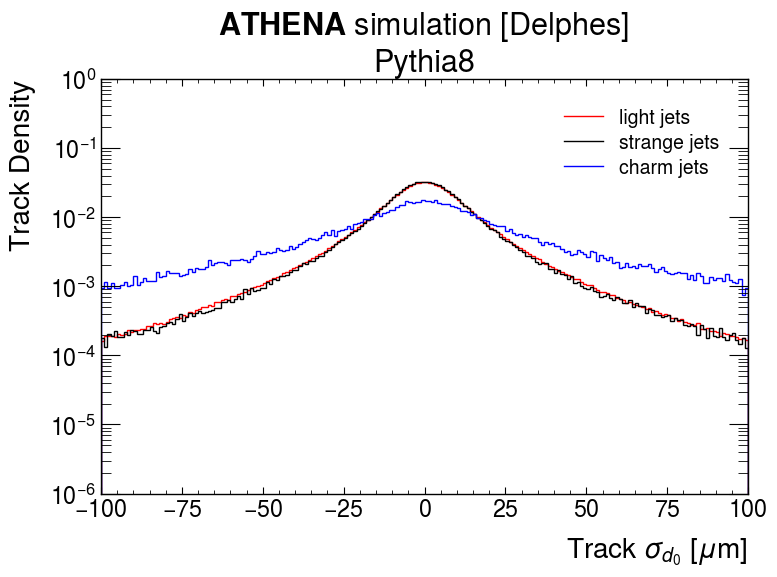

In [8]:
# Plot the track parameter for the tracks
hep.histplot(histograms.get_hist("ljet_track_d0err"), histograms.get_bins("ljet_track_d0err"), color='r', label='light jets', density=True)

hep.histplot(histograms.get_hist("sjet_track_d0err"), histograms.get_bins("sjet_track_d0err"), color='k', label='strange jets', density=True)

hep.histplot(histograms.get_hist("cjet_track_d0err"), histograms.get_bins("cjet_track_d0err"), color='b', label='charm jets', density=True)

plt.yscale("log")
plt.ylim([1e-6, 1.0])
plt.xlabel("Track $\sigma_{d_0}$ [$\mu$m]")
plt.ylabel("Track Density")
plt.legend()
plt.title(r"$\bf{ATHENA}$" +' simulation [Delphes] \nPythia8',fontsize=22)
plt.tight_layout()
plt.savefig("jets_track_d0err.png", dpi=200)

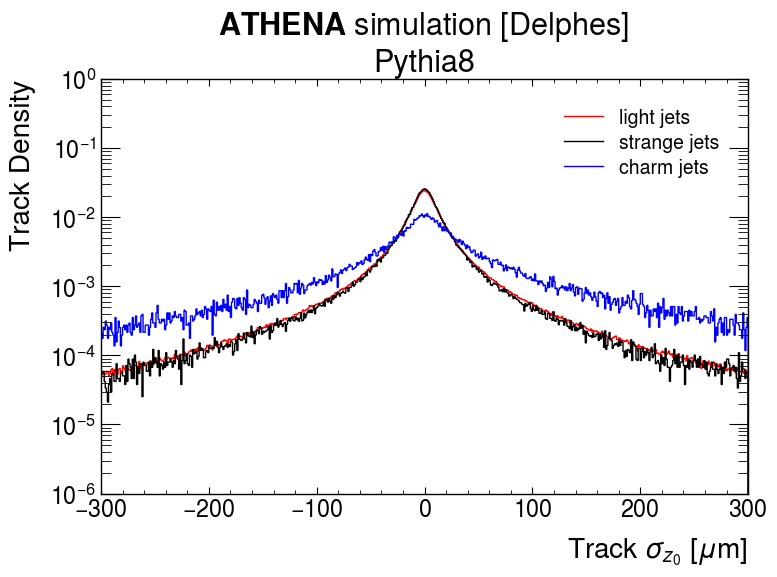

In [9]:
# Plot the track parameter for the tracks
hep.histplot(histograms.get_hist("ljet_track_z0err"), histograms.get_bins("ljet_track_z0err"), color='r', label='light jets', density=True)

hep.histplot(histograms.get_hist("sjet_track_z0err"), histograms.get_bins("sjet_track_z0err"), color='k', label='strange jets', density=True)

hep.histplot(histograms.get_hist("cjet_track_z0err"), histograms.get_bins("cjet_track_z0err"), color='b', label='charm jets', density=True)

plt.yscale("log")
plt.ylim([1e-6, 1.0])
plt.xlabel("Track $\sigma_{z_0}$ [$\mu$m]")
plt.ylabel("Track Density")
plt.legend()
plt.title(r"$\bf{ATHENA}$" +' simulation [Delphes] \nPythia8',fontsize=22)
plt.tight_layout()
plt.savefig("jets_track_z0err.png", dpi=200)

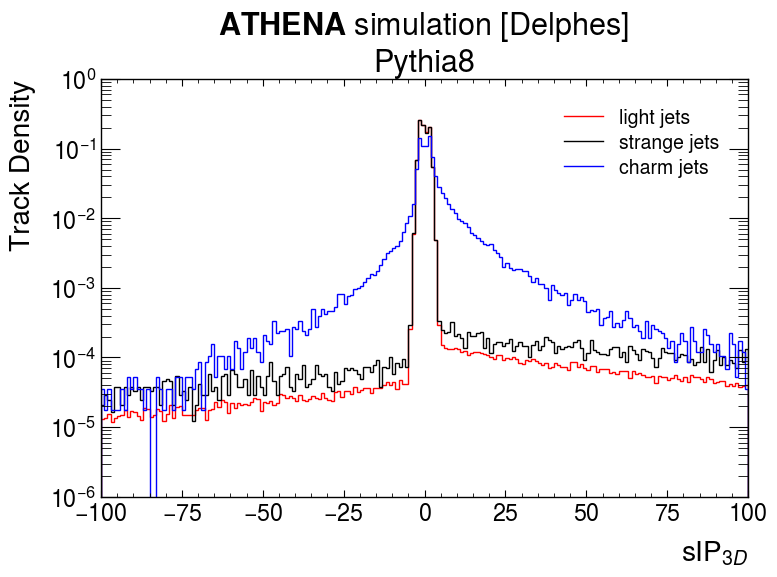

In [10]:
# Plot the signed 3D impact parameter for the tracks
hep.histplot(histograms.get_hist("ljet_track_sIP3D"), histograms.get_bins("ljet_track_sIP3D"), color='r', label='light jets', density=True)

hep.histplot(histograms.get_hist("sjet_track_sIP3D"), histograms.get_bins("sjet_track_sIP3D"),color='k', label='strange jets', density=True)

hep.histplot(histograms.get_hist("cjet_track_sIP3D"), histograms.get_bins("cjet_track_sIP3D"), color='b', label='charm jets', density=True)

plt.yscale("log")
plt.ylim([1e-6, 1.0])
plt.xlabel("$\mathrm{sIP}_{3D}}$")
plt.ylabel("Track Density")
plt.legend()
plt.title(r"$\bf{ATHENA}$" +' simulation [Delphes] \nPythia8',fontsize=22)
plt.tight_layout()
plt.savefig("jets_track_sIP3D.png", dpi=200)

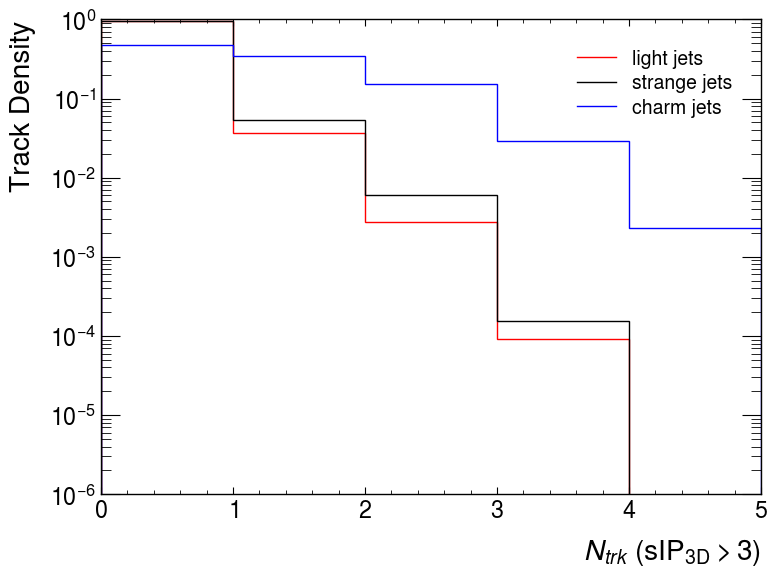

In [11]:
# Plot the jet track multiplicity
hep.histplot(histograms.get_hist("ljet_track_n"), histograms.get_bins("ljet_track_n"), color='r', label='light jets', density=True)

hep.histplot(histograms.get_hist("sjet_track_n"), histograms.get_bins("sjet_track_n"),color='k', label='strange jets', density=True)

hep.histplot(histograms.get_hist("cjet_track_n"), histograms.get_bins("cjet_track_n"), color='b', label='charm jets', density=True)

#plt.yscale("log")
plt.ylim([0, 1.0])
plt.xlabel("$N_{trk}$ ($\mathrm{sIP_{3D}} > 3$)")
plt.ylabel("Track Density")
plt.yscale("log")
plt.ylim([1e-6,1])
plt.legend()
plt.tight_layout()
plt.savefig("jets_track_n.png", dpi=200)

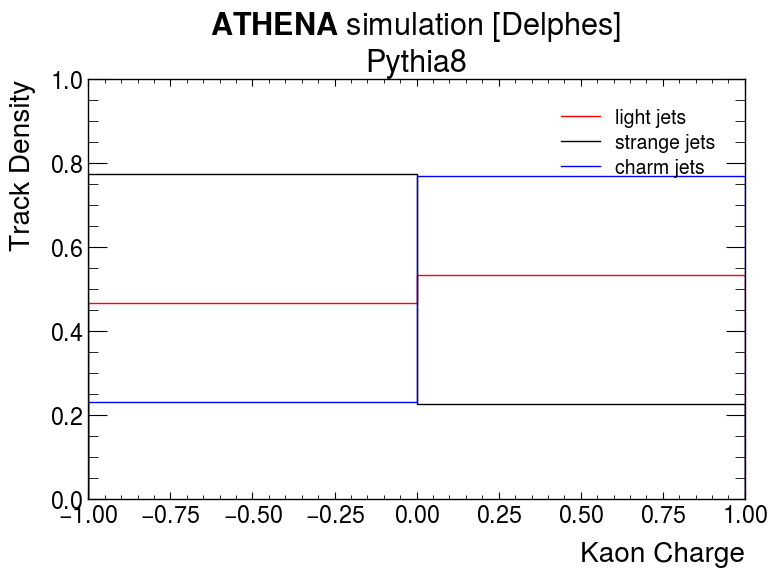

In [12]:
# Plot the kaon charge sign
hep.histplot(histograms.get_hist("ljet_k1_q"), histograms.get_bins("ljet_k1_q"), color='r', label='light jets', density=True)

hep.histplot(histograms.get_hist("sjet_k1_q"), histograms.get_bins("sjet_k1_q"), color='k', label='strange jets', density=True)

hep.histplot(histograms.get_hist("cjet_k1_q"), histograms.get_bins("cjet_k1_q"), color='b', label='charm jets', density=True)

#plt.yscale("log")
plt.ylim([0, 1.0])
plt.xlabel("Kaon Charge")
plt.ylabel("Track Density")
#plt.yscale("log")
#plt.ylim([1e-6,1])
plt.legend()
plt.title(r"$\bf{ATHENA}$" +' simulation [Delphes] \nPythia8',fontsize=22)
plt.tight_layout()
plt.savefig("jets_k1_q.png", dpi=200)

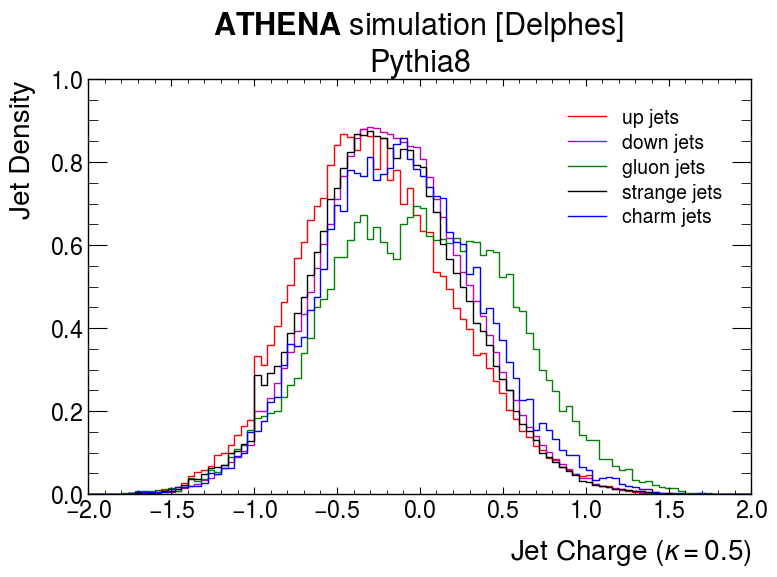

In [13]:
# Plot the jet charge
hep.histplot(histograms.get_hist("ujet_jet_charge_05"), histograms.get_bins("ujet_jet_charge_05"), color='r', label='up jets', density=True)
hep.histplot(histograms.get_hist("djet_jet_charge_05"), histograms.get_bins("djet_jet_charge_05"), color='m', label='down jets', density=True)
hep.histplot(histograms.get_hist("gjet_jet_charge_05"), histograms.get_bins("gjet_jet_charge_05"), color='g', label='gluon jets', density=True)
hep.histplot(histograms.get_hist("sjet_jet_charge_05"), histograms.get_bins("sjet_jet_charge_05"), color='k', label='strange jets', density=True)
hep.histplot(histograms.get_hist("cjet_jet_charge_05"), histograms.get_bins("cjet_jet_charge_05"), color='b', label='charm jets', density=True)


#plt.yscale("log")
plt.ylim([0, 1.0])
plt.xlabel("Jet Charge ($\kappa=0.5$)")
plt.ylabel("Jet Density")
#plt.yscale("log")
#plt.ylim([1e-6,1])
plt.legend()
plt.title(r"$\bf{ATHENA}$" +' simulation [Delphes] \nPythia8',fontsize=22)
plt.tight_layout()
plt.savefig("jets_jetcharge05.png", dpi=200)

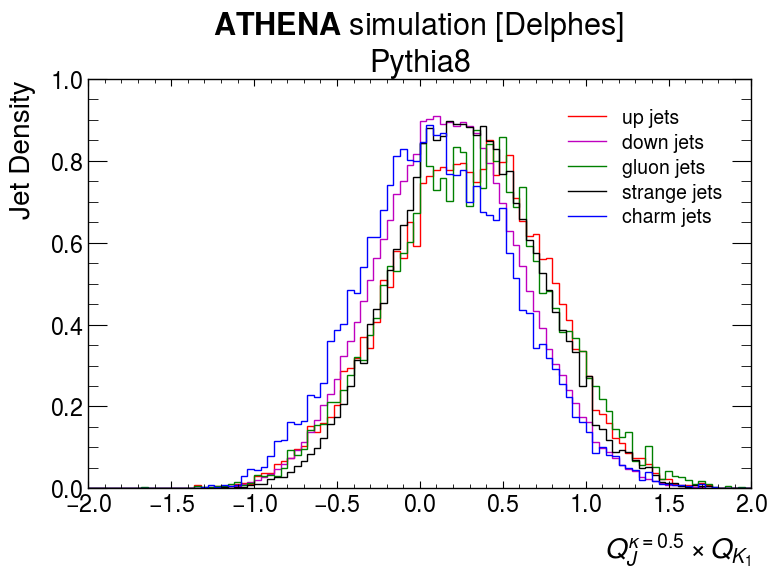

In [14]:
# Plot the jet charge
hep.histplot(histograms.get_hist("ujet_jq05k1q"), histograms.get_bins("ujet_jq05k1q"), color='r', label='up jets', density=True)
hep.histplot(histograms.get_hist("djet_jq05k1q"), histograms.get_bins("djet_jq05k1q"), color='m', label='down jets', density=True)
hep.histplot(histograms.get_hist("gjet_jq05k1q"), histograms.get_bins("gjet_jq05k1q"), color='g', label='gluon jets', density=True)
hep.histplot(histograms.get_hist("sjet_jq05k1q"), histograms.get_bins("sjet_jq05k1q"), color='k', label='strange jets', density=True)
hep.histplot(histograms.get_hist("cjet_jq05k1q"), histograms.get_bins("cjet_jq05k1q"), color='b', label='charm jets', density=True)


#plt.yscale("log")
plt.ylim([0, 1.0])
plt.xlabel("$Q_{J}^{\kappa=0.5} \\times Q_{K_{1}}$")
plt.ylabel("Jet Density")
#plt.yscale("log")
#plt.ylim([1e-6,1])
plt.legend()
plt.title(r"$\bf{ATHENA}$" +' simulation [Delphes] \nPythia8',fontsize=22)
plt.tight_layout()
plt.savefig("jets_jq05k1q.png", dpi=200)

# Electrons in Jets

In [48]:
def ComparePlot(histfactory=None, histograms=[], labels=[], colors=[], ylimits=[0,1], logplot=False, axislabels=["x", "y"]):
    if histfactory == None:
        return
    for index, name in enumerate(histograms):
        hep.histplot(histfactory.get_hist(name), histfactory.get_bins(name), color=colors[index], label=labels[index], density=True)

    if logplot:
        plt.yscale('log')
    plt.ylim(ylimits)
    plt.xlabel(axislabels[0])
    plt.ylabel(axislabels[1])
    plt.legend()
    plt.title(r"$\bf{ATHENA}$" +' simulation [Delphes] \nPythia8',fontsize=22)
    plt.tight_layout()
    plt.savefig(f"{'_'.join(histograms)}.png", dpi=200)

In [ ]:
# files = {"ATHENA-CC-DIS-2021-06-15-oleaa/[0-9]/out.root": "tree", 
#          "ATHENA-CC-DIS-2021-06-15-oleaa/[1-9][0-9]/out.root": "tree"}


#files = {"ATHENA-CC-DIS-2021-06-15-oleaa/0/out.root": "tree"}

files = {"ATHENA-CC-DIS-2021-06-15-oleaa/ATHENA-CC-DIS-2021-06-15-oleaa-20M.root": "tree"}

branches = ['Electron_ChargedElectron_CALO_Eem', 'Electron_ChargedElectron_CALO_Ehad',
           'Electron_ChargedElectron_TRU_ID']

lastbatch = {}

el_hists = HistManager()

for batch in uproot.iterate([files], 
                            branches, 
                            library="pd"):
    
    lastbatch = batch
    
    ECALEnergy = batch["Electron_ChargedElectron_CALO_Eem"].ravel()
    HCALEnergy = batch["Electron_ChargedElectron_CALO_Ehad"].ravel()
    PdgID = batch["Electron_ChargedElectron_TRU_ID"].ravel()

    
    
    # Truth information
    
    electrons = np.fabs(PdgID) == 11
    pions = np.fabs(PdgID) == 211
    
    # Energy Plots
    el_hists.add(batch, "el_ECAL", ECALEnergy, cuts=[electrons], nbins=50, range=[0, 5])
    el_hists.add(batch, "pi_ECAL", ECALEnergy, cuts=[pions], nbins=50, range=[0, 5])
    el_hists.add(batch, "el_HCAL", HCALEnergy, cuts=[electrons], nbins=50, range=[0, 5])
    el_hists.add(batch, "pi_HCAL", HCALEnergy, cuts=[pions], nbins=50, range=[0, 5])
    el_hists.add(batch, "el_fEM", ECALEnergy/(ECALEnergy+HCALEnergy), cuts=[electrons], nbins=1000, range=[0, 1])
    el_hists.add(batch, "pi_fEM", ECALEnergy/(ECALEnergy+HCALEnergy), cuts=[pions], nbins=1000, range=[0, 1])

    
all_histograms = el_hists.get_all()
for h in all_histograms:
    print(f"Histogram {h} has {np.sum(el_hists.get_hist(h))} entries.")

Creating histogram named el_ECAL ... 
Creating histogram named pi_ECAL ... 
Creating histogram named el_HCAL ... 
Creating histogram named pi_HCAL ... 


<ipython-input-53-e48258832765>:38: RuntimeWarning: invalid value encountered in true_divide
  el_hists.add(batch, "el_fEM", ECALEnergy/(ECALEnergy+HCALEnergy), cuts=[electrons], nbins=1000, range=[0, 1])
<ipython-input-53-e48258832765>:39: RuntimeWarning: invalid value encountered in true_divide
  el_hists.add(batch, "pi_fEM", ECALEnergy/(ECALEnergy+HCALEnergy), cuts=[pions], nbins=1000, range=[0, 1])


Creating histogram named el_fEM ... 
Creating histogram named pi_fEM ... 


In [ ]:
ComparePlot(el_hists, ['el_ECAL', 'pi_ECAL'], ['$e$', '$\pi$'], ['b','r'], [0, 1], False, ["ECAL Energy", "Density"])

In [ ]:
ComparePlot(el_hists, ['el_HCAL', 'pi_HCAL'], ['$e$', '$\pi$'], ['b','r'], [0, 10], False, ["HCAL Energy", "Density"])

In [ ]:
ComparePlot(el_hists, ['el_fEM', 'pi_fEM'], ['$e$', '$\pi$'], ['b','r'], [1e-4, 1000], True, ["ECAL Energy Fraction", "Density"])

In [ ]:
# Figure of Merit-based electron selection optimization

nel_total = np.sum(el_hists.get_hist('el_fEM'))
npi_total = np.sum(el_hists.get_hist('pi_fEM'))

FOM = []

for i in range(len(el_hists.get_hist('el_fEM'))):
    nel = np.sum(el_hists.get_hist('el_fEM')[i:])
    npi = np.sum(el_hists.get_hist('pi_fEM')[i:])

    eff_el = nel/nel_total
    eff_pi = npi/npi_total
    
    FOM.append(eff_el/(3/2 + eff_pi))
    
# Find best one
bestFOM = np.max(FOM)
bestIndex = int(np.where(FOM == bestFOM)[0])

print(f'FOM maximized at {el_hists.get_bins("el_fEM")[bestIndex]}')

eff_el = np.sum(el_hists.get_hist('el_fEM')[bestIndex:])/nel_total
eff_pi = np.sum(el_hists.get_hist('pi_fEM')[bestIndex:])/npi_total

print(f'Electron (Pion) Efficiency: {eff_el*100:.1f} ({eff_pi*100:.1f})%')